In [1]:

import pandas as pd
def get_df(remove_first, remove_last = 1):
    df = pd.read_excel(fr"C:\Users\halik\OneDrive\Dokumenty\GitHub\predikce-nabidky\funcni data set - Copy.xlsx")
    df = df.drop(df.index[:remove_first])
    df = df.drop(df.index[-remove_last:])
    df['datetime'] = pd.date_range(start='2016-03-01', periods=len(df.index.values), freq='MS')
    return df
get_df(13)

,datum,Unnamed: 1,repo-1,repo-2,repo-3,repo-4,repo-5,repo-6,repo-7,repo-8,...,doba-5,doba-6,doba-7,doba-8,doba-9,doba-10,doba-11,doba-12,index,datetime
13,201603,5,5,5,5,5,5,5,5,5,...,69.0,70.0,64.0,67.0,70.0,42.0,76.0,77.0,13,2016-03-01
14,201604,5,5,5,5,5,5,5,5,5,...,66.0,69.0,70.0,64.0,67.0,70.0,42.0,76.0,14,2016-04-01
15,201605,5,5,5,5,5,5,5,5,5,...,77.0,66.0,69.0,70.0,64.0,67.0,70.0,42.0,15,2016-05-01
16,201606,5,5,5,5,5,5,5,5,5,...,74.0,77.0,66.0,69.0,70.0,64.0,67.0,70.0,16,2016-06-01
17,201607,5,5,5,5,5,5,5,5,5,...,73.0,74.0,77.0,66.0,69.0,70.0,64.0,67.0,17,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,202211,700,700,700,700,700,700,575,500,450,...,66.0,60.0,62.0,62.0,67.0,76.0,66.0,61.0,93,2022-11-01
94,202212,700,700,700,700,700,700,575,500,450,...,68.0,66.0,60.0,62.0,62.0,67.0,76.0,66.0,94,2022-12-01
95,202301,700,700,700,700,700,700,575,500,450,...,67.0,68.0,66.0,60.0,62.0,62.0,67.0,76.0,95,2023-01-01
96,202302,700,700,700,700,700,700,575,500,450,...,71.0,67.0,68.0,66.0,60.0,62.0,62.0,67.0,96,2023-02-01


detrendování dat

In [2]:
df = get_df(12)
df_detrend = df.copy()
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
columns = ['aktivni', *parametry]
for column in columns:
    df_detrend[column] = pd.Series((df[column]))

deseasonalizování dat

In [3]:
import statsmodels.api as sm
df_deseasoned = df_detrend.copy()
for parametr in parametry:
    decomp = sm.tsa.seasonal_decompose(df_detrend[parametr], period=12, model='additive')
    df_deseasoned[parametr] = df_detrend[parametr] - decomp.seasonal.values

grafy

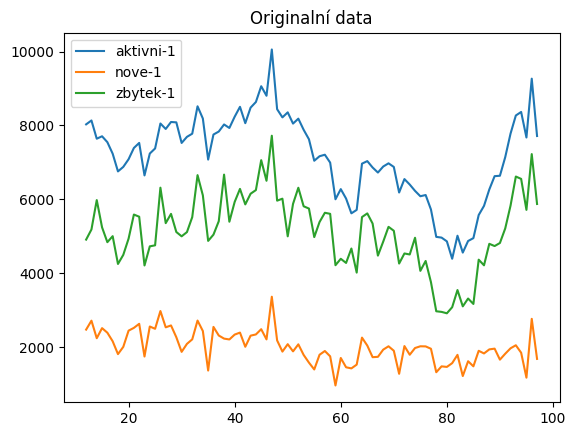

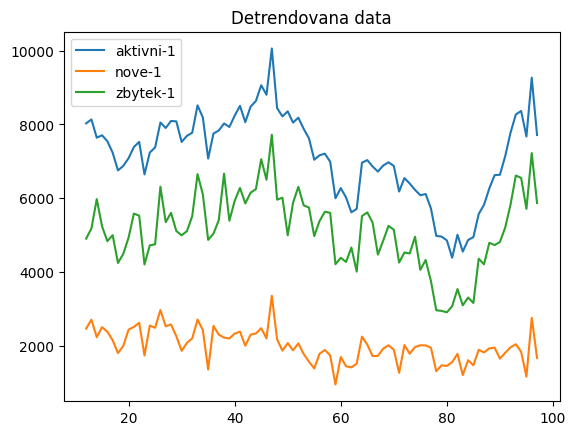

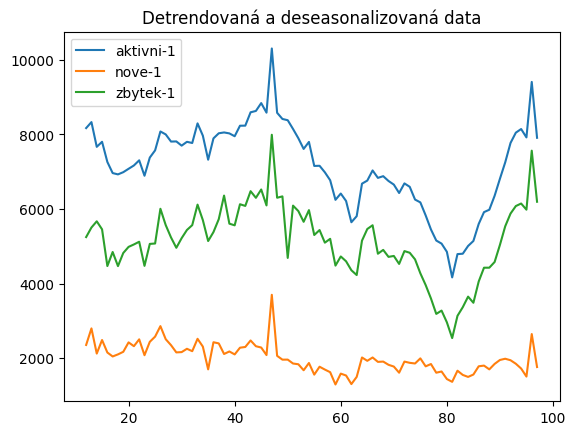

In [4]:
from matplotlib import pyplot as plt
#>> originalni data
plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Originalní data')
plt.show()
#>> detrendovana data
plt.plot(df.index, df_detrend['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Detrendovana data')
plt.show()
#>> detrendovana a deseasonalizovana data
plt.plot(df.index, df_deseasoned['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_deseasoned['nove-1'], label='nove-1')
plt.plot(df.index, df_deseasoned['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Detrendovaná a deseasonalizovaná data')
plt.show()

OLS model

Mean absolute error (train set): 310.00
Mean squared error (train set): 184716.65
Root mean squared error (train set): 429.79
r2 (train set): 0.87


Mean absolute error (test set): 602.12
Mean squared error (test set): 479209.16
Root mean squared error (test set): 692.25
r2 (test set): 0.50


                            OLS Regression Results                            
Dep. Variable:                aktivni   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.00e-25
Time:                        15:55:46   Log-Likelihood:                -553.68
No. Observations:                  74   AIC:                             1115.
Df Residuals:                      70   BIC:                             1125.
Df Model:                           3                                     

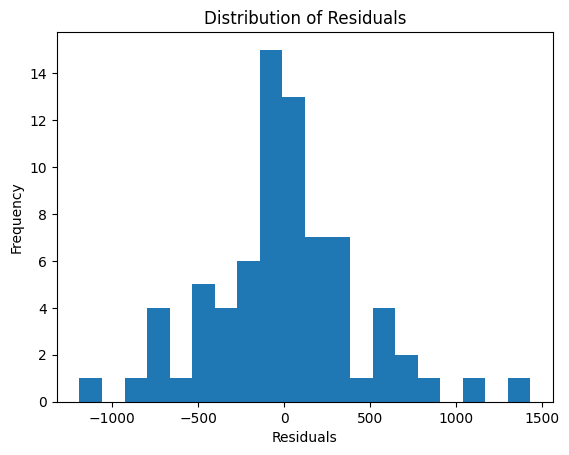

CPU times: total: 141 ms
Wall time: 1.95 s


In [5]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report, r2_score

import statsmodels.api as sm
from statsmodels.tools import add_constant

#*defiunovani dat
#@parametry
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
X = df_deseasoned[parametry]
y = df_deseasoned['aktivni']

#*Add a constant term to the training and testing data
X = add_constant(X)

#* training dataframe bez randomizace
X_train = X.drop(X.index[-12:])
y_train = y.drop(y.index[-12:])
#* testing dataframe bez randomizace
X_test = X.drop(X.index[:-12])
X_test = X_test.drop(X_test.index[-1:])
y_test = y.drop(y.index[:-12])
y_test = y_test.drop(y_test.index[-1:])


#* fitnuti ols_model modelu na train datech
ols_model = sm.OLS(y_train, X_train).fit(cov_type='HC0')

#*predikce na train datech
y_pred_train = ols_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

#*predikce na test setu
y_pred_test = ols_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

#>> output
print(f"Mean absolute error (train set): {mae_train:.2f}")
print(f"Mean squared error (train set): {mse_train:.2f}")
print(f"Root mean squared error (train set): {rmse_train:.2f}")
print(f"r2 (train set): {r2_train:.2f}")
print("\n")
print(f"Mean absolute error (test set): {mae_test:.2f}")
print(f"Mean squared error (test set): {mse_test:.2f}")
print(f"Root mean squared error (test set): {rmse_test:.2f}")
print(f"r2 (test set): {r2_test:.2f}")
print("\n")
print(ols_model.summary())
# plot the distribution of residuals
residuals = y_train - y_pred_train
plt.hist(residuals, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

predikce

In [6]:

#! nemusim k predikcim pridavat sezonost a trend protoze jsem je nikdy neodebral z 'aktinvi'
X_new = X.drop(X.index[:-1])
y_pred = ols_model.predict(X_new)
predikce = y_pred
print(f"""
Model:      {ols_model}
Min:        {int(y_pred-rmse_test)}
Predikce:   {int(y_pred)}
Max:        {int(y_pred+rmse_test)}
Rmse:       {int(rmse_test)}
""")


Model:      <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002015909BE50>
Min:        7232
Predikce:   7924
Max:        8616
Rmse:       692



graf predikce

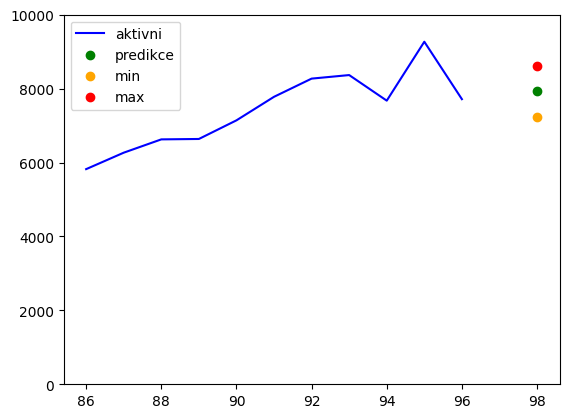

In [7]:
#* realita
plt.plot(y_test.index, y_test.values,label="aktivni",color="blue")
#* predikce
plt.scatter(X_new.index+1, y_pred.values, label='predikce', color="green")
plt.scatter(X_new.index+1, y_pred.values-rmse_test, label='min', color="orange")
plt.scatter(X_new.index+1, y_pred.values+rmse_test, label='max', color="red")
plt.ylim(0,10000)
plt.legend()
plt.show()

grafy vztahů

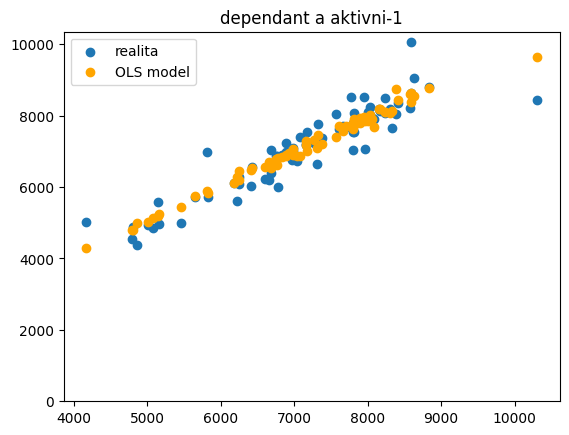

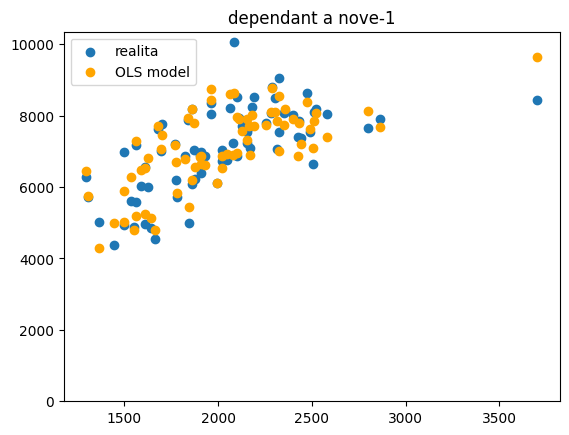

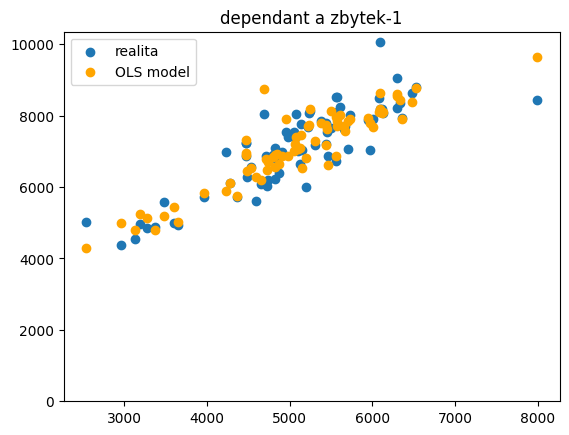

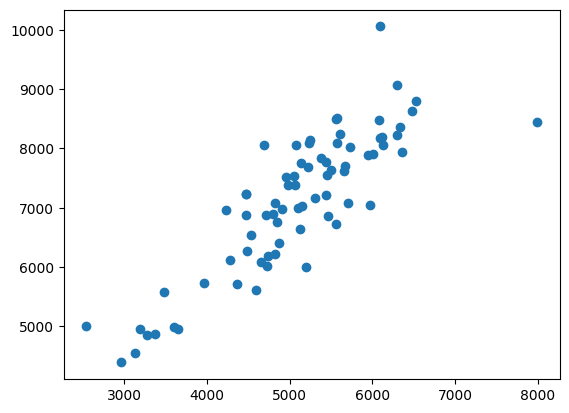

In [8]:
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
for parametr in parametry:
    plt.scatter( X_train[parametr], y_train, label="realita")
    plt.scatter(X_train[parametr], y_pred_train, color="orange", label="OLS model")
    plt.ylim(0)
    plt.legend()
    plt.title(f'dependant a {parametr}')
    plt.show()
plt.scatter(X_train[parametr], y_train, label="aktivni-1")
#plt.plot(range(10000), ols_model.predict(range(10000))) 

Graf model vs realita

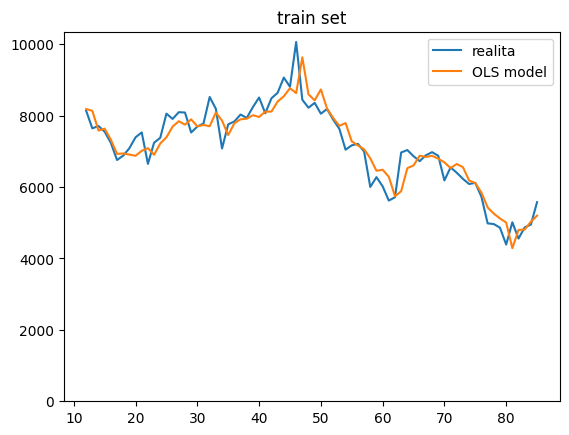

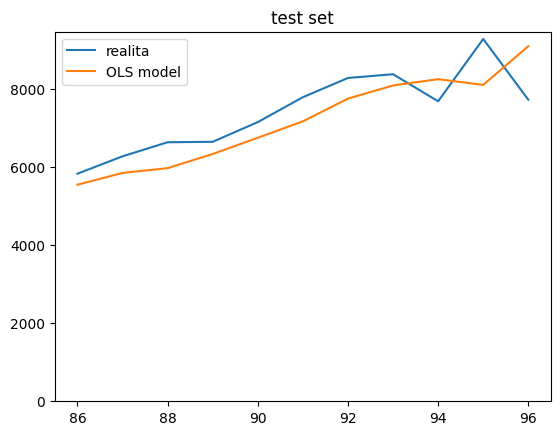

In [9]:
plt.plot(X_train.index, y_train, label='realita')
plt.plot(X_train.index, y_pred_train, label='OLS model')
plt.title('train set')
plt.legend()
plt.ylim(0)
plt.show()

plt.plot(X_test.index, y_test, label='realita')
plt.plot(X_test.index, y_pred_test, label='OLS model')
plt.title('test set')
plt.legend()
plt.ylim(0)
plt.show()


autokorelace 

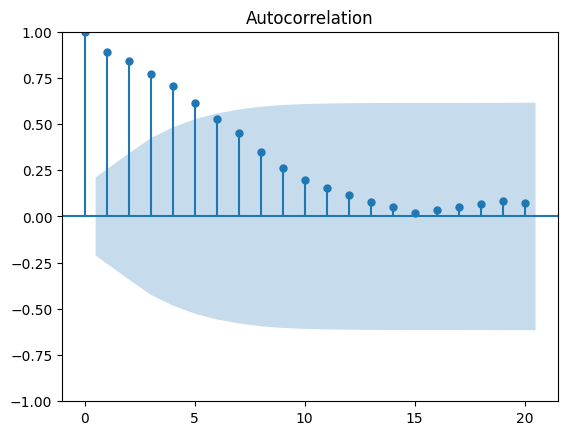

C:\Users\halik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


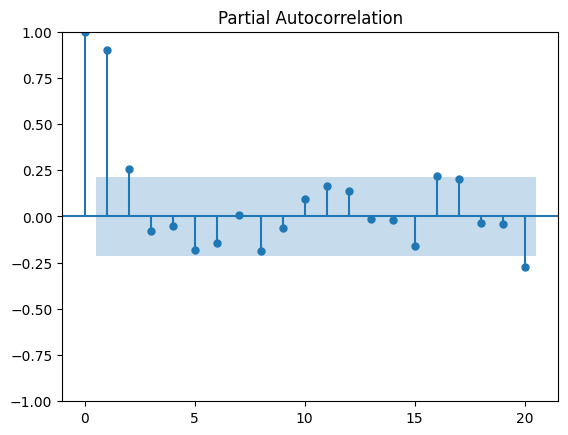

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_deseasoned['aktivni'])
plt.show()
plot_pacf(df_deseasoned['aktivni'])
plt.show()

ARIMA model

In [11]:

# // TODO    ARIMA s externím regresorem, AR, I, MA
# // TODO    Verbálně vysvětli, co každý z těchto parametrů dělá.
# // TODO    Při dělaní ARIMY a jejího nastavení se ti bude velmi hodit ACF and PACF
# // TODO    NEDELIT data na train test protoze jich mam malo
# // TODO    z PACF vyvodim AR, AR dam cislo lagu po kterym to vyrazne klesne
# // TODO    proiterovat moznosti pro arimu ruzny AR, I=0,1,2, MA=1 až 5
# // TODO    metriky pro arimy aic, aicc, bic - chci vsechny co nejmensi
# // TODO    vybrat model s nejlepsima hodnoama v radku nad timhle


from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm

#! SMAZAT NA DEBUGING
import warnings
warnings.filterwarnings("ignore")

#@ hyperparametry ARIMY 
p_list = [0,1,2,6]  # AR myslim si ze by to melo byt 2 aby nebyl overfitting protoze pacf hodne spadne po lag=2
d_list = [0,1,2]  # I 
q_list = [0,1, 2, 3, 4, 5]  # MA
#>> shaneni dat
parametry = ['nove-1', 'aktivni']

df_arima = df_deseasoned[parametry]

target = df_arima['aktivni']
external_regressor_list = ['nove-1']
external_regressor = df_arima[[*external_regressor_list]]
#>> modely
for p in tqdm(p_list):
    best_score = [100000000000000000000]
    for d in d_list:
        for q in q_list:
            if not p+q > len(target)/10:
                model = ARIMA(target, order=(p, d, q), exog= external_regressor)
                model_fit = model.fit()
                aic = model_fit.aic
                aicc = model_fit.aicc
                bic = model_fit.bic
                score = aic+aicc+bic
            if score < best_score:
                best_score = score
                best_model = model_fit
    print(f"AIC: {aic}")
    print(f"AICC: {aicc}")
    print(f"BIC: {bic}")
    print(best_model.summary())

 25%|██▌       | 1/4 [00:03<00:09,  3.08s/it]

AIC: 1305.007188346936
AICC: 1306.4808725574621
BIC: 1322.0229059388391
                               SARIMAX Results                                
Dep. Variable:                aktivni   No. Observations:                   86
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -646.165
Date:                Sat, 15 Jul 2023   AIC                           1298.331
Time:                        15:55:51   BIC                           1305.623
Sample:                             0   HQIC                          1301.262
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nove-1        -0.3599      0.085     -4.223      0.000      -0.527      -0.193
ma.L1         -0.9996      2.405     -0.416      0.678     

 50%|█████     | 2/4 [00:10<00:11,  5.53s/it]

AIC: 1307.433416293885
AICC: 1309.3534162938852
BIC: 1326.8799506846317
                               SARIMAX Results                                
Dep. Variable:                aktivni   No. Observations:                   86
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -646.166
Date:                Sat, 15 Jul 2023   AIC                           1300.331
Time:                        15:55:58   BIC                           1310.054
Sample:                             0   HQIC                          1304.240
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nove-1        -0.3579      0.160     -2.237      0.025      -0.671      -0.044
ar.L1         -0.0021      0.152     -0.014      0.989     

 75%|███████▌  | 3/4 [00:20<00:07,  7.57s/it]

AIC: 1310.1257358565745
AICC: 1312.558168289007
BIC: 1332.0030870461642
                               SARIMAX Results                                
Dep. Variable:                aktivni   No. Observations:                   86
Model:                 ARIMA(2, 0, 5)   Log Likelihood                   0.000
Date:                Sat, 15 Jul 2023   AIC                             20.000
Time:                        15:56:08   BIC                             44.543
Sample:                             0   HQIC                            29.878
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3800.1439         -0       -inf      0.000    3800.144    3800.144
nove-1        -1.4781         -0        inf      0.000     

100%|██████████| 4/4 [00:27<00:00,  6.76s/it]

AIC: 1310.8114359636334
AICC: 1313.8251345937704
BIC: 1335.1196039520664
                               SARIMAX Results                                
Dep. Variable:                aktivni   No. Observations:                   86
Model:                 ARIMA(6, 2, 1)   Log Likelihood                -645.437
Date:                Sat, 15 Jul 2023   AIC                           1308.875
Time:                        15:56:15   BIC                           1330.752
Sample:                             0   HQIC                          1317.669
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nove-1        -0.3913      0.196     -2.001      0.045      -0.775      -0.008
ar.L1          0.0031      0.185      0.017      0.987    

expanding window forecast

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Parameters ARIMA
p = 1
d = 2
q = 1
external_regressor_list = ['nove-1']

exw_start = 50  # Start window size
exw_step = 1    # Window size increment

exw_best_mae_average = 100000000000
df_exw_pred = []
best_exw_size = None
mae_list = []
mse_list = []
rmse_list = []
exw_mae_average_list = []
exw_mse_average_list = []
exw_rmse_average_list = []

# Expanding window forecast
for i in range(exw_start, len(df_arima), exw_step):
    df_train = df_arima[:i]
    model = ARIMA(df_train[['aktivni']], order=(p, d, q), exog=df_train[[*external_regressor_list]])
    model = model.fit()
    df_new = df_arima[i:i+exw_step]
    
    df_pred = model.forecast(steps=exw_step, exog=df_new[[*external_regressor_list]])
    df_exw_pred.append(df_pred)
    
    # Evaluation
    df_actual = df_arima[i:i+exw_step]
    df_actual = df_actual[['aktivni']]
    
    mae = mean_absolute_error(df_actual, df_pred)
    mse = mean_squared_error(df_actual, df_pred, squared=True)
    rmse = mean_squared_error(df_actual, df_pred, squared=False)
    
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    
    mae_average = sum(mae_list) / len(mae_list)
    exw_mae_average_list.append(mae_average)
    
    exw_mse_average = sum(mse_list) / len(mse_list)
    exw_mse_average_list.append(exw_mse_average)
    
    rmse_average = sum(rmse_list) / len(rmse_list)
    exw_rmse_average_list.append(rmse_average)

exw_best_mae_average = min(exw_mae_average_list[1:])
best_exw_size = exw_mae_average_list[1:].index(min(exw_mae_average_list[1:])) + exw_start

df_exw_pred = pd.concat(df_exw_pred)

print(f"Best average MAE: {exw_best_mae_average}")
print(f"Best expanding window size: {best_exw_size}")


Best average MAE: 280.8262427442598
Best expanding window size: 62


rolling window forecast

In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Rolling window sizes
rw_sizes = range(1,len(df_arima),5)

# Initialize lists to store metrics for each rolling window size
rw_mae_list = []
rw_mse_list = []
rw_rmse_list = []

# Iterate over rolling window sizes
for rw_size in rw_sizes:
    # Lists to store predictions and actual values for the current window size
    predictions = []
    actual_values = []
    
    # Perform rolling window analysis
    for i in range(len(df_arima) - rw_size):
        # Select training data
        df_train = df_arima[i:i + rw_size]

        # Fit ARIMA model
        model = ARIMA(df_train[['aktivni']], order=(p, d, q), exog=df_train[[*external_regressor_list]])
        model = model.fit()

        # Predict using the model
        df_new = df_arima[i + rw_size:i + rw_size + 1]
        df_pred = model.forecast(exog=df_new[[*external_regressor_list]])

        # Extract actual and predicted values
        df_actual = df_arima[i + rw_size:i + rw_size + 1]
        df_actual = df_actual[['aktivni']]
        actual_value = df_actual.values.flatten()[0]
        predicted_value = df_pred.item()

        # Append actual and predicted values to respective lists
        actual_values.append(actual_value)
        predictions.append(predicted_value)

    print(f"Iteration {rw_sizes.index(rw_size) + 1} of {len(rw_sizes)} done", end='\r') 
    # Calculate metrics for the current window size
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)

    # Append metrics to respective lists
    rw_mae_list.append(mae)
    rw_mse_list.append(mse)
    rw_rmse_list.append(rmse)

# Print the metrics for each rolling window size
for i, rw_size in enumerate(rw_sizes):
    print(f"Rolling Window Size: {rw_size}")
    print(f"MAE: {rw_mae_list[i]}")
    print(f"MSE: {rw_mse_list[i]}")
    print(f"RMSE: {rw_rmse_list[i]}")


Rolling Window Size: 1e
MAE: 3578.1959046138113
MSE: 13554051.937918607
RMSE: 3681.5828033494786
Rolling Window Size: 6
MAE: 945.5441165670169
MSE: 4289833.611822771
RMSE: 2071.1913508468433
Rolling Window Size: 11
MAE: 603.4700965918605
MSE: 828866.6674719731
RMSE: 910.4211484098846
Rolling Window Size: 16
MAE: 518.1408725886183
MSE: 496385.0684770564
RMSE: 704.5460016755871
Rolling Window Size: 21
MAE: 482.353805738087
MSE: 432830.52533032844
RMSE: 657.8985676609491
Rolling Window Size: 26
MAE: 445.503039576896
MSE: 383997.460549311
RMSE: 619.6752863793351
Rolling Window Size: 31
MAE: 461.1571139420537
MSE: 404297.4238338919
RMSE: 635.8438674972748
Rolling Window Size: 36
MAE: 430.04289797425224
MSE: 352115.5619680352
RMSE: 593.3932608043633
Rolling Window Size: 41
MAE: 423.222278924858
MSE: 368826.4461883971
RMSE: 607.3108316079972
Rolling Window Size: 46
MAE: 423.6888633207307
MSE: 372513.3618757815
RMSE: 610.3387271636803
Rolling Window Size: 51
MAE: 398.6435357310215
MSE: 330792.

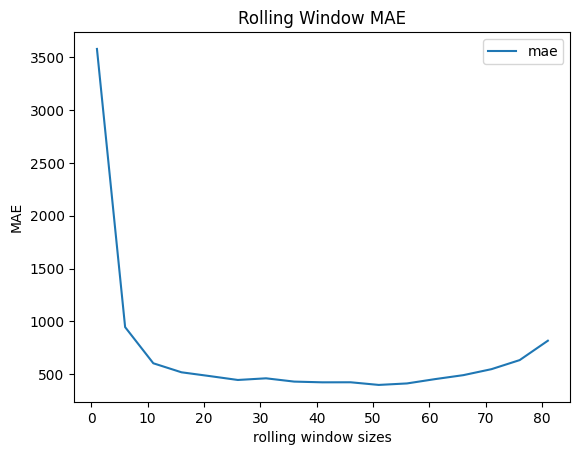

best rw size = 51


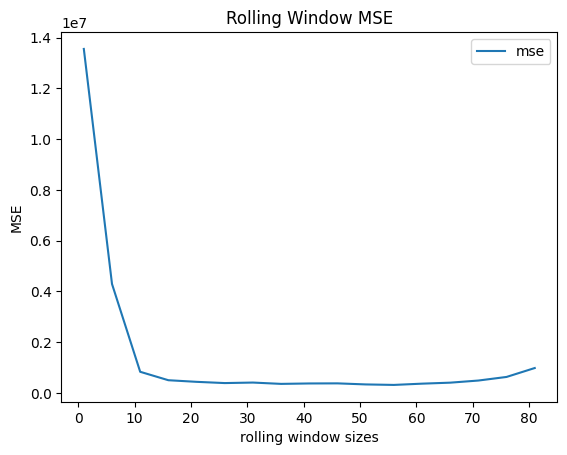

best rw size = 56


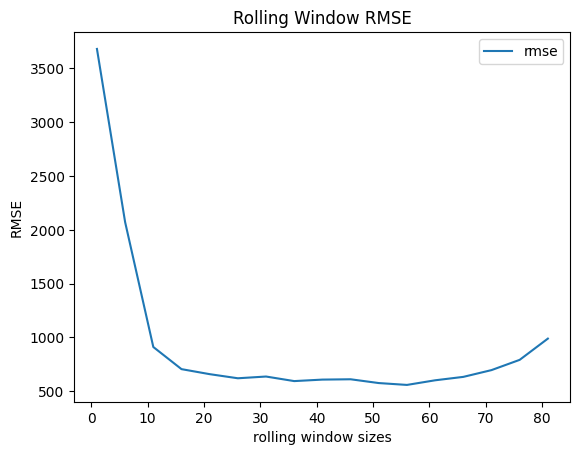

best rw size = 56


In [23]:
tohle_je_jenom_na_schovani_kodu = True
#>> grafy MAE, MSE, RMSE
if tohle_je_jenom_na_schovani_kodu:
    plt.title("Rolling Window MAE")
    plt.xlabel('rolling window sizes')
    plt.ylabel("MAE")
    plt.plot(rw_sizes, rw_mae_list, label ="mae")
    plt.legend()
    plt.show()
    print(f'best rw size = {rw_sizes[rw_mae_list.index(min(rw_mae_list))]}')

    plt.title("Rolling Window MSE")
    plt.xlabel('rolling window sizes')
    plt.ylabel("MSE")
    plt.plot(rw_sizes, rw_mse_list, label= "mse")
    plt.legend()
    plt.show()
    print(f'best rw size = {rw_sizes[rw_mse_list.index(min(rw_mse_list))]}')
    
    plt.title("Rolling Window RMSE")
    plt.xlabel('rolling window sizes')
    plt.ylabel("RMSE")
    plt.plot(rw_sizes, rw_rmse_list, label= "rmse")
    plt.legend()
    plt.show()
    print(f'best rw size = {rw_sizes[rw_rmse_list.index(min(rw_rmse_list))]}')

In [15]:

# TODO priklad na clustering v jiny git repo